# Aplicação Prática - Perceptron

Vamos trabalhar no problema da porta lógica AND/OR. Como mostrado na tabela abaixo:

| X_1 | X_2 | AND | OR |
|-----|-----|-----|----|
| 0   | 0   | 0   | 0  |
| 0   | 1   | 0   | 1  |
| 1   | 0   | 0   | 1  |
| 1   | 1   | 1   | 1  |

A estrutura do Perceptron é:

![image](https://i.ibb.co/Vg32Db7/perceptron-and-gate.png)


A saída deverá obedecer a função de limiar:


![image](https://i.ibb.co/k1fpt5S/formula.png)


Lembrando que

![image](https://i.ibb.co/bgRhms8/Perceptron-formula2.png)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Classe Perceptron



In [ ]:
class Perceptron:

    def __init__(self, learning_rate=0.5, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        print(f'Pesos Iniciais {self.weights}')

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):

                print(f'Pesos atuais {self.weights}')

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

                print(f'Para as Amostras {x_i} foi previsto a saida {y_predicted}.')
                print(f'Foi feito o update para {update}')
                print(f'O peso foi para {self.weights} e o bias foi para {self.bias}')
                print('\n')


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    


## Treinamento

In [ ]:
X_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([0,1,1,0])


p = Perceptron(learning_rate=0.5, n_iters=10)
p.fit(X_train, y_train)


Pesos Iniciais [0. 0.]
Pesos atuais [0. 0.]
Para as Amostras [0 0] foi previsto a saida 1.
Foi feito o update para -0.5
O peso foi para [0. 0.] e o bias foi para -0.5


Pesos atuais [0. 0.]
Para as Amostras [0 1] foi previsto a saida 0.
Foi feito o update para 0.5
O peso foi para [0.  0.5] e o bias foi para 0.0


Pesos atuais [0.  0.5]
Para as Amostras [1 0] foi previsto a saida 1.
Foi feito o update para 0.0
O peso foi para [0.  0.5] e o bias foi para 0.0


Pesos atuais [0.  0.5]
Para as Amostras [1 1] foi previsto a saida 1.
Foi feito o update para -0.5
O peso foi para [-0.5  0. ] e o bias foi para -0.5


Pesos atuais [-0.5  0. ]
Para as Amostras [0 0] foi previsto a saida 0.
Foi feito o update para 0.0
O peso foi para [-0.5  0. ] e o bias foi para -0.5


Pesos atuais [-0.5  0. ]
Para as Amostras [0 1] foi previsto a saida 0.
Foi feito o update para 0.5
O peso foi para [-0.5  0.5] e o bias foi para 0.0


Pesos atuais [-0.5  0.5]
Para as Amostras [1 0] foi previsto a saida 0.
Foi feit

## Predição

In [ ]:

X_test = np.array([0.000000000000001, 0.0000000001])

predictions = p.predict(X_test)
print(f'Passando como valores a serem preditos {X_test[0], X_test[1]} temos a predição de {predictions}')


Passando como valores a serem preditos (1e-15, 1e-10) temos a predição de 0


# Plot do dados

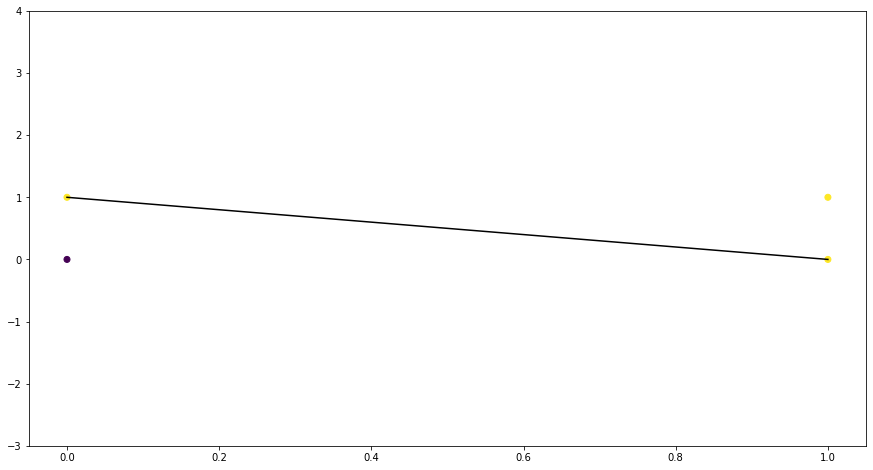

In [ ]:

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

## Dados fictícios

A saída de streaming foi truncada nas últimas 5000 linhas.
Pesos atuais [-0.00479318 -0.0047352 ]
Para as Amostras [-7.20922123  8.41058793] foi previsto a saida 0.
Foi feito o update para 0.01
O peso foi para [-0.07688539  0.07937068] e o bias foi para -0.05


Pesos atuais [-0.07688539  0.07937068]
Para as Amostras [-4.66501761  7.83769193] foi previsto a saida 1.
Foi feito o update para 0.0
O peso foi para [-0.07688539  0.07937068] e o bias foi para -0.05


Pesos atuais [-0.07688539  0.07937068]
Para as Amostras [-6.94666906  6.96912383] foi previsto a saida 1.
Foi feito o update para 0.0
O peso foi para [-0.07688539  0.07937068] e o bias foi para -0.05


Pesos atuais [-0.07688539  0.07937068]
Para as Amostras [-5.0795956   9.76451002] foi previsto a saida 1.
Foi feito o update para -0.01
O peso foi para [-0.02608943 -0.01827442] e o bias foi para -0.060000000000000005


Pesos atuais [-0.02608943 -0.01827442]
Para as Amostras [-5.93690697  8.04829131] foi previsto a saida 0.
Foi feit

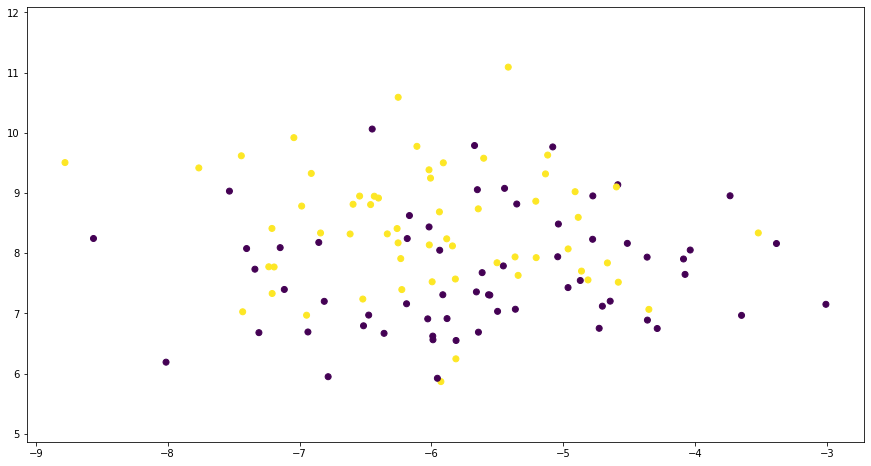

In [ ]:
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=5)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


p = Perceptron(learning_rate=0.01, n_iters=10)
p.fit(X_train, y_train)


predictions = p.predict(X_test)
print(predictions)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 1, ymax + 1])

plt.show()